# TWITTER Analysis based on COVID-19 with Sentiment Analysis

Recently, the number of tweets on COVID-19 are increasing at an unprecedented rate by including positive, negative and neutral tweets. This diversified nature of tweets has attracted the researchers to perform sentiment analysis and analyze the varied emotions of a large public towards COVID-19. The traditional sentiment analysis techniques will only find out the polarity and classify it as either positive, negative or neutral tweets. As an advanced step, the proposed research work attempts to find the sentiment of tweets using Roberta-base sentiment analysis. 
The proposed analysis methods are more sensitive to sentiment expressions in social media contexts, while it can be generalized on the basis of the domain.

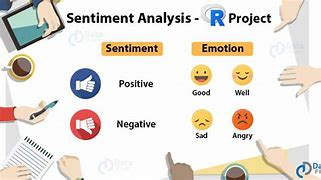


In [3]:
# Install required libraries
%pip install datasets transformers huggingface_hub -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 15.3 MB/s eta 0:00:00


In [33]:
# Login to HF hub
notebook_login()
     

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import key libraries
import numpy as np
import os
import pandas as pd
import re

from datasets import load_dataset
#import evaluate
from huggingface_hub import notebook_login
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TrainingArguments, Trainer
from transformers import AutoTokenizer, RobertaModel
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')

In [6]:
# Disable Weights & Biases
os.environ["WANDB_DISABLED"] = "true"

In [7]:
# Loading the datasets
train_df = pd.read_csv('/content/drive/MyDrive/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Test.csv')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5177 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 81.0+ KB


## Lets check null values

In [10]:
train_df.isna().sum()
     

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

In [11]:
train_df[train_df.isna().any(axis=1)]

,tweet_id,safe_text,label,agreement
4798,RQMQ0L2A,#lawandorderSVU,NaN,NaN
4799,I cannot believe in this day and age some pare...,1,0.666667,NaN


In [12]:
test_df[test_df.isna().any(axis=1)]

,tweet_id,safe_text
2024,Dr. JAMES SHANNON,NaN


In [13]:
# Drop the rows with nulls from the training data
train_df.dropna(inplace = True)
     

In [14]:
#Rechecking the data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   safe_text  9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [15]:
# Reconvert it to  respective data types
train_df['label'] = train_df['label'].astype(float)


# Training

Spliting train data into training and validation sets

In [16]:
train, eval = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'],shuffle=True)

# Fine-tuning the Roberta base Model










In [17]:
# Instantiate the tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base", num_labels=3)

In [18]:
# Save split data subsets
train.to_csv('/content/drive/MyDrive/Train_subset.csv', index=False)
eval.to_csv('/content/drive/MyDrive/Eval_subset.csv', index=False)
     

In [19]:
# Load the subsetted data
data = load_dataset ("csv", 
                    data_files={"train": '/content/drive/MyDrive/Train_subset.csv',
                                "eval": '/content/drive/MyDrive/Eval_subset.csv'}, 
                    encoding = "ISO-8859-1")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-c985ff15f64844ab/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [20]:
# Define helper functions
## Function to transform labels
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

## Function to tokenize data
def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

In [21]:
# Tokenize the tweets
dataset = data.map(tokenize_data, batched=True)

# Transform	labels and limit the columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [23]:
# Define training arguments

training_args = TrainingArguments(
    "covid_tweets_sentiment_analysis_model", 
                                  num_train_epochs=10, 
                                  load_best_model_at_end=True, 
                                  save_strategy='epoch',
                                  evaluation_strategy='epoch',
                                  logging_strategy='epoch',
                                  logging_steps=100,
                                  per_device_train_batch_size=16,
                                  )

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [24]:
# Load the pretrained model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)
     

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [25]:
# Define evaluation metrics

def compute_metrics_regression(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"rmse": mean_squared_error(labels, predictions, squared=False)}

In [26]:
# Formed  train and evaluation datasets
train_dataset = dataset["train"].shuffle(seed=24) 
eval_dataset = dataset["eval"].shuffle(seed=24)

In [27]:
#converting training data to PyTorch tensors 
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [28]:
trainer = Trainer(
    model,
    training_args, 
    train_dataset=train_dataset, 
    eval_dataset=eval_dataset,
    # data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics_regression,
)

In [29]:
trainer.train()

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rmse
1,0.743400,0.731574,0.770714
2,0.609200,0.572794,0.685565
3,0.481000,0.611577,0.647688
4,0.354000,0.634614,0.621691
5,0.264800,0.851703,0.629285
6,0.203400,1.022603,0.631664
7,0.146000,1.212701,0.634823
8,0.106900,1.350261,0.628888


Epoch,Training Loss,Validation Loss,Rmse
1,0.743400,0.731574,0.770714
2,0.609200,0.572794,0.685565
3,0.481000,0.611577,0.647688
4,0.354000,0.634614,0.621691
5,0.264800,0.851703,0.629285
6,0.203400,1.022603,0.631664
7,0.146000,1.212701,0.634823
8,0.106900,1.350261,0.628888
9,0.074000,1.415813,0.636003
10,0.058000,1.534667,0.634429


TrainOutput(global_step=5000, training_loss=0.30405977325439454, metrics={'train_runtime': 7670.187, 'train_samples_per_second': 10.429, 'train_steps_per_second': 0.652, 'total_flos': 2.104644228406272e+16, 'train_loss': 0.30405977325439454, 'epoch': 10.0})

In [30]:
# Launch the final evaluation 
trainer.evaluate()


{'eval_loss': 0.5727943181991577,
 'eval_rmse': 0.6855654600401044,
 'eval_runtime': 58.6369,
 'eval_samples_per_second': 34.108,
 'eval_steps_per_second': 4.264,
 'epoch': 10.0}

In [34]:
# Push model and tokenizer to HugginFace 
model.push_to_hub("Kwasiasomani/Finetuned-Roberta-base-model")
tokenizer.push_to_hub("Kwasiasomani/Finetuned-Roberta-base-model")

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Kwasiasomani/Finetuned-Roberta-base-model/commit/885b4067c2356b88f4571c70521f0be31448efd1', commit_message='Upload tokenizer', commit_description='', oid='885b4067c2356b88f4571c70521f0be31448efd1', pr_url=None, pr_revision=None, pr_num=None)